In [34]:
!pip install statsmodels

In [56]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
!pip install statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
df = pd.read_csv('부산시장데이터.csv')

df.head()

,시장명,카드이용금액,유동인구수,점포수,공중화장실보유여부,주차장보유여부,개설 후 기간,구 인구,행정동 인구,편의점,"주유소,충전소",문화시설,관광명소,음식점,카페,월
0,괴정골목시장,284493000,30276,145,0,0,49,236485,12770,40,4,1,0,491,61,1월
1,괴정골목시장,202965000,27931,145,0,0,49,236485,12770,40,4,1,0,491,61,2월
2,괴정골목시장,178481000,30569,145,0,0,49,236485,12770,40,4,1,0,491,61,3월
3,괴정골목시장,194715000,31331,145,0,0,49,236485,12770,40,4,1,0,491,61,4월
4,괴정골목시장,283463000,32684,145,0,0,49,236485,12770,40,4,1,0,491,61,5월


In [58]:
df=df.drop(['월','시장명'],axis=1)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   카드이용금액     240 non-null    int64
 1   유동인구수      240 non-null    int64
 2   점포수        240 non-null    int64
 3   공중화장실보유여부  240 non-null    int64
 4   주차장보유여부    240 non-null    int64
 5   개설 후 기간    240 non-null    int64
 6   구 인구       240 non-null    int64
 7   행정동 인구     240 non-null    int64
 8   편의점        240 non-null    int64
 9   주유소,충전소    240 non-null    int64
 10  문화시설       240 non-null    int64
 11  관광명소       240 non-null    int64
 12  음식점        240 non-null    int64
 13  카페         240 non-null    int64
dtypes: int64(14)
memory usage: 26.4 KB


Text(0.5, 1.0, '카페')

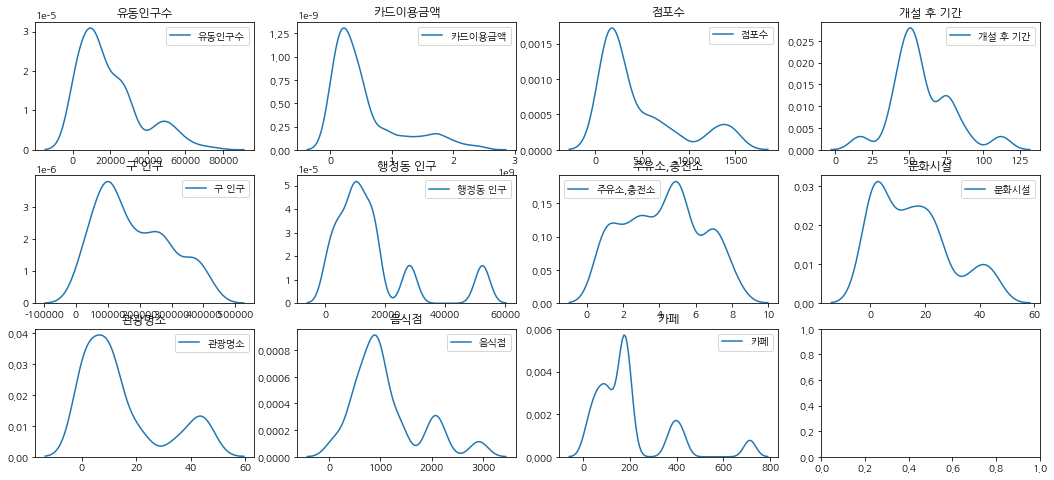

In [61]:
f,ax=plt.subplots(nrows=3, ncols=4, figsize=(18,8))

sns.kdeplot(df['유동인구수'], ax=ax[0,0])
ax[0,0].set_title('유동인구수')

sns.kdeplot(df['카드이용금액'], ax=ax[0,1])
ax[0,1].set_title('카드이용금액')

sns.kdeplot(df['점포수'], ax=ax[0,2])
ax[0,2].set_title('점포수')

sns.kdeplot(df['개설 후 기간'], ax=ax[0,3])
ax[0,3].set_title('개설 후 기간')

sns.kdeplot(df['구 인구'], ax=ax[1,0])
ax[1,0].set_title('구 인구')

sns.kdeplot(df['행정동 인구'], ax=ax[1,1])
ax[1,1].set_title('행정동 인구')

sns.kdeplot(df['주유소,충전소'], ax=ax[1,2])
ax[1,2].set_title('주유소,충전소')

sns.kdeplot(df['문화시설'], ax=ax[1,3])
ax[1,3].set_title('문화시설')

sns.kdeplot(df['관광명소'], ax=ax[2,0])
ax[2,0].set_title('관광명소')

sns.kdeplot(df['음식점'], ax=ax[2,1])
ax[2,1].set_title('음식점')

sns.kdeplot(df['카페'], ax=ax[2,2])
ax[2,2].set_title('카페')


## 1. 데이터 정규화
변수들의 그래프가 대부분 왼쪽으로 치우쳐져 있어 로그변환 시행

Text(0.5, 1.0, '카페')

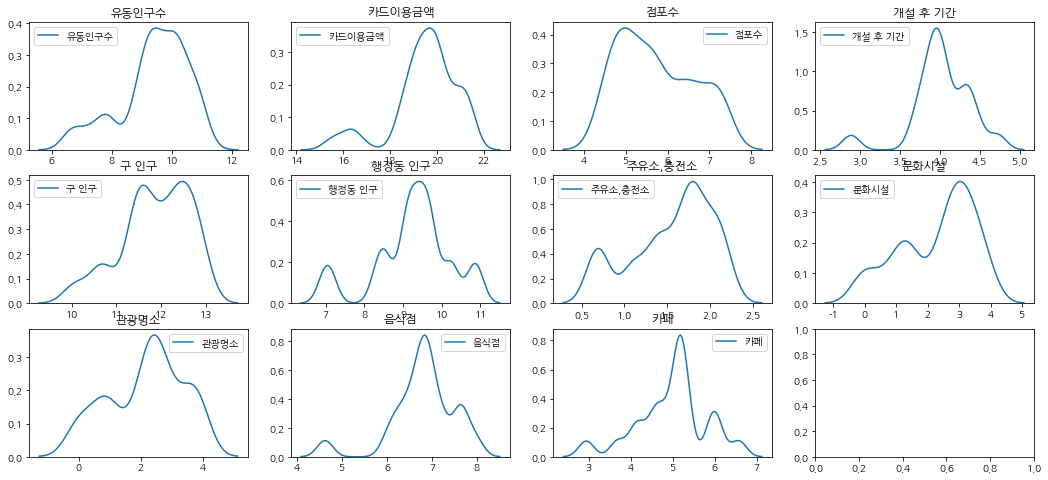

In [62]:
df_log=np.log1p(df)
f,ax=plt.subplots(nrows=3, ncols=4, figsize=(18,8))

sns.kdeplot(df_log['유동인구수'], ax=ax[0,0])
ax[0,0].set_title('유동인구수')

sns.kdeplot(df_log['카드이용금액'], ax=ax[0,1])
ax[0,1].set_title('카드이용금액')

sns.kdeplot(df_log['점포수'], ax=ax[0,2])
ax[0,2].set_title('점포수')

sns.kdeplot(df_log['개설 후 기간'], ax=ax[0,3])
ax[0,3].set_title('개설 후 기간')

sns.kdeplot(df_log['구 인구'], ax=ax[1,0])
ax[1,0].set_title('구 인구')

sns.kdeplot(df_log['행정동 인구'], ax=ax[1,1])
ax[1,1].set_title('행정동 인구')

sns.kdeplot(df_log['주유소,충전소'], ax=ax[1,2])
ax[1,2].set_title('주유소,충전소')

sns.kdeplot(df_log['문화시설'], ax=ax[1,3])
ax[1,3].set_title('문화시설')

sns.kdeplot(df_log['관광명소'], ax=ax[2,0])
ax[2,0].set_title('관광명소')

sns.kdeplot(df_log['음식점'], ax=ax[2,1])
ax[2,1].set_title('음식점')

sns.kdeplot(df_log['카페'], ax=ax[2,2])
ax[2,2].set_title('카페')

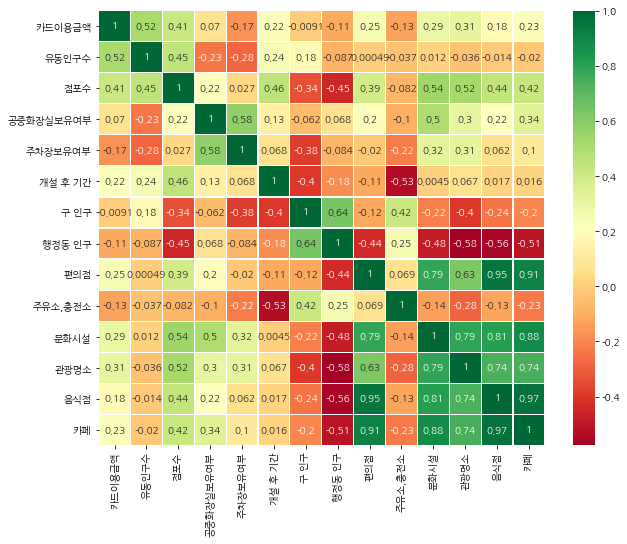

In [64]:
sns.heatmap(df_log.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 

fig=plt.gcf() # fig에 접근
fig.set_size_inches(10,8) # fig그림 크기 조절
plt.show()

In [69]:
target = df_log[['카드이용금액']]
x_data = df_log.drop(['카드이용금액'],axis=1)
# df[[col]] - DataFrame형태로 컬럼 추출 / df[col] - Series형태로 컬럼추출

x_data.head()

,유동인구수,점포수,공중화장실보유여부,주차장보유여부,개설 후 기간,구 인구,행정동 인구,편의점,"주유소,충전소",문화시설,관광명소,음식점,카페
0,10.318144,4.983607,0.0,0.0,3.912023,12.373644,9.454932,3.713572,1.609438,0.693147,0.0,6.198479,4.127134
1,10.237528,4.983607,0.0,0.0,3.912023,12.373644,9.454932,3.713572,1.609438,0.693147,0.0,6.198479,4.127134
2,10.327774,4.983607,0.0,0.0,3.912023,12.373644,9.454932,3.713572,1.609438,0.693147,0.0,6.198479,4.127134
3,10.352395,4.983607,0.0,0.0,3.912023,12.373644,9.454932,3.713572,1.609438,0.693147,0.0,6.198479,4.127134
4,10.394672,4.983607,0.0,0.0,3.912023,12.373644,9.454932,3.713572,1.609438,0.693147,0.0,6.198479,4.127134


In [70]:
x_data1 = sm.add_constant(x_data, has_constant = "add")

multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()

fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 카드이용금액   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     33.98
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           5.70e-46
Time:                        15:45:16   Log-Likelihood:                -289.67
No. Observations:                 240   AIC:                             607.3
Df Residuals:                     226   BIC:                             656.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.1597      2.339     12.894      0.000      25.550      34.769
유동인구수          0.5923      0.074      8.030      0.000       0.447       0.738
점포수            0.0058      0.136      0.042      0.966      -0.263       0.275
공중화장실보유여부     -0.3891      0.403     -0.965      0.336      -1.184       0.406
주차장보유여부        0.1896      0.412      0.460      0.646      -0.622       1.001
개설 후 기간        1.4780      0.275      5.370      0.000       0.936       2.020
구 인구          -0.2575      0.143     -1.803      0.073      -0.539       0.024
행정동 인구        -0.0304      0.106     -0.287      0.774      -0.239       0.178
편의점            4.7270      0.481      9.819      0.000       3.778       5.676
주유소,충전소        0.5853      0.271      2.160      0.032       0.051       1.119
문화시설          -1.1860      0.248     -4.776      0.000      -1.675      -0.697
관광명소           1.1305      0.109     10.385      0.000       0.916       1.345
음식점           -9.0037      0.997     -9.032      0.000     -10.968      -7.039
카페             4.6551      0.790      5.896      0.000       3.099       6.211
==============================================================================
Omnibus:                        9.129   Durbin-Watson:                   0.329
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.950
Skew:                          -0.367   Prob(JB):                      0.00691
Kurtosis:                       3.675   Cond. No.                         986.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(multi_model.exog, i)} 
             for i, column in enumerate(multi_model.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,const,1889.432205
1,유동인구수,2.392250
2,점포수,5.162427
3,공중화장실보유여부,4.319048
4,주차장보유여부,5.274753
5,개설 후 기간,3.536672
6,구 인구,4.045513
7,행정동 인구,3.809185
8,편의점,36.620434
9,"주유소,충전소",5.588013


## 2. 다중공선성 확인
VIF가 10을 넘기는 변수 중 지수가 큰 변수부터 하나씩 제거하여 다중공선성을 유발하는 음식점, 카페 변수를 제거한다. VIF가 5보다 큰 문화시설변수는 주의가 필요하다


In [82]:
x_data = df_log.drop(['카드이용금액','음식점','카페'],axis=1)

x_data1 = sm.add_constant(x_data, has_constant = "add")

multi_model = sm.OLS(target, x_data1)

pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(multi_model.exog, i)} 
             for i, column in enumerate(multi_model.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,const,1147.688715
1,유동인구수,2.204081
2,점포수,4.516790
3,공중화장실보유여부,2.702284
4,주차장보유여부,2.662825
5,개설 후 기간,2.726956
6,구 인구,3.704672
7,행정동 인구,3.011156
8,편의점,4.142324
9,"주유소,충전소",2.444412


In [83]:
fitted_multi_model = multi_model.fit()

fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 카드이용금액   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     19.87
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           8.41e-28
Time:                        16:02:39   Log-Likelihood:                -339.01
No. Observations:                 240   AIC:                             702.0
Df Residuals:                     228   BIC:                             743.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.4639      2.229      6.488      0.000      10.071      18.857
유동인구수          0.8139      0.087      9.401      0.000       0.643       0.985
점포수           -0.4238      0.156     -2.716      0.007      -0.731      -0.116
공중화장실보유여부      1.1862      0.390      3.040      0.003       0.417       1.955
주차장보유여부       -1.9930      0.358     -5.571      0.000      -2.698      -1.288
개설 후 기간        0.4366      0.296      1.477      0.141      -0.146       1.019
구 인구          -0.6601      0.167     -3.950      0.000      -0.989      -0.331
행정동 인구         0.4878      0.115      4.237      0.000       0.261       0.715
편의점           -0.1318      0.198     -0.666      0.506      -0.522       0.258
주유소,충전소        0.2786      0.219      1.271      0.205      -0.153       0.710
문화시설           0.2800      0.162      1.728      0.085      -0.039       0.599
관광명소           0.5435      0.109      4.981      0.000       0.328       0.758
==============================================================================
Omnibus:                       89.596   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              285.953
Skew:                          -1.601   Prob(JB):                     8.06e-63
Kurtosis:                       7.283   Cond. No.                         679.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3. 의미없는 변수 제거
다중회귀분석결과 타겟에 영향을 미치지 않는 개설 후 기간, 편의점, 주유소,충전소, 문화시설 변수제거

In [87]:
x_data = df_log.drop(['카드이용금액','음식점','카페','편의점','주유소,충전소','개설 후 기간','문화시설'],axis=1)

x_data1 = sm.add_constant(x_data, has_constant = "add")

multi_model = sm.OLS(target, x_data1)

fitted_multi_model = multi_model.fit()

fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 카드이용금액   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     30.45
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           1.08e-29
Time:                        16:03:49   Log-Likelihood:                -341.47
No. Observations:                 240   AIC:                             698.9
Df Residuals:                     232   BIC:                             726.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.1290      1.586      9.540      0.000      12.004      18.254
유동인구수          0.7943      0.082      9.728      0.000       0.633       0.955
점포수           -0.2372      0.122     -1.946      0.053      -0.477       0.003
공중화장실보유여부      1.4958      0.349      4.284      0.000       0.808       2.184
주차장보유여부       -1.8780      0.325     -5.781      0.000      -2.518      -1.238
구 인구          -0.5753      0.141     -4.074      0.000      -0.854      -0.297
행정동 인구         0.4274      0.107      3.982      0.000       0.216       0.639
관광명소           0.5803      0.082      7.039      0.000       0.418       0.743
==============================================================================
Omnibus:                       78.052   Durbin-Watson:                   0.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.135
Skew:                          -1.408   Prob(JB):                     1.06e-50
Kurtosis:                       6.883   Cond. No.                         459.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
print(fitted_multi_model.params)

const        15.128981
유동인구수         0.794293
점포수          -0.237210
공중화장실보유여부     1.495836
주차장보유여부      -1.877962
구 인구         -0.575276
행정동 인구        0.427390
관광명소          0.580349
dtype: float64


위의 회귀 모델은 0.479의 설명력을 가지고 있으며 F검정 결과 식의 계수는 유의하다.

유동인구수가 카드매출에 가장 큰 영향을 미치고 있다.

구 인구와 행정동 인구는 타겟에 대한 영향이 서로 다르며 높은 행정동 인구 수와 주변에 많은 관광명소가 시장을 높이는데 영향을 주고있다.

공중화장실 및 주차장 보유여부는 수치적의미가 없으므로 다른 변수와의 영향은 비교하지 않기로 한다.

하지만 공중화장실보유여부은 매출과 양의 관계 주차장 보유여부는 음의 관계를 띄고있다. 주차장이 있는 곳이 매출이 높아야하다는 것이 일반적인 상식일 수있는데 이런 결과가 나온것으로 보아 주차장 관리나 요금 등의 문제가 있을 수 있다.